In [ ]:

%%capture
!pip install genomic-benchmarks
!pip install qiskit qiskit_machine_learning qiskit_algorithms

!pip install qiskit
!pip install qiskit_machine_learning
!pip install qiskit-aer

In [ ]:
from genomic_benchmarks.dataset_getters.pytorch_datasets import DemoHumanOrWorm

test_set = DemoHumanOrWorm(split='test', version=0)
train_set = DemoHumanOrWorm(split='train', version=0)

data_set = train_set
# data_set = train_set + test_set
len(data_set)

/usr/local/lib/python3.10/dist-packages/genomic_benchmarks/utils/datasets.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
Downloading...
From (original): https://drive.google.com/uc?id=1JW0-eTB-rJXvFcglqBo3pFZi1kyIWC3X
From (redirected): https://drive.google.com/uc?id=1JW0-eTB-rJXvFcglqBo3pFZi1kyIWC3X&confirm=t&uuid=43336eca-a0b8-4b40-b85c-f64b6e08c41f
To: /root/.genomic_benchmarks/demo_human_or_worm.zip
100%|██████████| 28.9M/28.9M [00:00<00:00, 39.8MB/s]


75000

In [ ]:
from collections import defaultdict
import numpy as np

word_size = 40
word_combinations = defaultdict(int)
iteration = 1
for text, _ in data_set:
    for i in range(len(text)):
        word = text[i:i+word_size]
        if word_combinations.get(word) is None:
          word_combinations[word] = iteration
          iteration += 1


In [ ]:
print("First sample int the data_set variable: ")
print(data_set[0])

print("\nFirst 5 samples in the word_combinations dict.")
for key, value in list(word_combinations.items())[:5]:
    print(key, value)

First sample int the data_set variable: 
('AGTAAGTTTTCCTCCCTTCTTTTTGGCTTTCTCAGTGTTTAAAAACTCCCATATTTGGAAACTCTCTGGTGATTCCTTAAAGATTGAAAATGGGTAGATGTTGAATGCTATCTAAGCCAGATGATCCTGGGATCTTCCCACACCAGCTTCTGGGAACTGGGAAACTTCTAACTAGCTAGACAGAACTAAAGTACCATCTT', 0)

First 5 samples in the word_combinations dict.
AGTAAGTTTTCCTCCCTTCTTTTTGGCTTTCTCAGTGTTT 1
GTAAGTTTTCCTCCCTTCTTTTTGGCTTTCTCAGTGTTTA 2
TAAGTTTTCCTCCCTTCTTTTTGGCTTTCTCAGTGTTTAA 3
AAGTTTTCCTCCCTTCTTTTTGGCTTTCTCAGTGTTTAAA 4
AGTTTTCCTCCCTTCTTTTTGGCTTTCTCAGTGTTTAAAA 5


In [ ]:
import numpy as np
# Preprocess the training set
np_data_set = []
for i in range(len(data_set)):
    sequence, label = data_set[i]
    sequence = sequence.strip()  # Remove any leading/trailing whitespace
    words = [sequence[i:i + word_size] for i in range(0, len(sequence), word_size)]  # Split the sequence into 4-letter words
    int_sequence = np.array([word_combinations[word] for word in words])
    data_point = {'sequence': int_sequence, 'label': label}
    np_data_set.append(data_point)


print("First 5 samples of encoded data:")
np_data_set[:5]

First 5 samples of encoded data:


[{'sequence': array([  1,  41,  81, 121, 161]), 'label': 0},
 {'sequence': array([201, 241, 281, 321, 361]), 'label': 0},
 {'sequence': array([401, 441, 481, 521, 561]), 'label': 0},
 {'sequence': array([600, 640, 680, 720, 760]), 'label': 0},
 {'sequence': array([800, 840, 880, 920, 960]), 'label': 0}]

In [ ]:
np.random.shuffle(np_data_set)
print("First 5 samples of encoded shuffled data:")
np_data_set[:5]

First 5 samples of encoded shuffled data:


[{'sequence': array([1806104, 1806144, 1806184, 1806224, 1806264]),
  'label': 0},
 {'sequence': array([9232075, 9232115, 9232155, 9232195, 9232235]),
  'label': 1},
 {'sequence': array([13613532, 13613572, 13613612, 13613652, 13613692]),
  'label': 1},
 {'sequence': array([8763761, 8763801, 8763841, 8763881, 8763921]),
  'label': 1},
 {'sequence': array([679330, 679370, 679410, 679450, 679490]), 'label': 0}]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sequences = np.array([item['sequence'] for item in np_data_set])
sequences = np.vstack(sequences)

scaler = MinMaxScaler()

sequences_scaled = scaler.fit_transform(sequences)

for i, item in enumerate(np_data_set):
    item['sequence'] = sequences_scaled[i]

print("First 5 samples of scaled encoded shuffled data:")
np_data_set[:5]

First 5 samples of scaled encoded shuffled data:


[{'sequence': array([0.13089375, 0.13089375, 0.13089375, 0.13089375, 0.13089375]),
  'label': 0},
 {'sequence': array([0.66907635, 0.66907635, 0.66907635, 0.66907635, 0.66907635]),
  'label': 1},
 {'sequence': array([0.9866138, 0.9866138, 0.9866138, 0.9866138, 0.9866138]),
  'label': 1},
 {'sequence': array([0.63513621, 0.63513621, 0.63513621, 0.63513621, 0.63513621]),
  'label': 1},
 {'sequence': array([0.04923303, 0.04923303, 0.04923303, 0.04923303, 0.04923303]),
  'label': 0}]

In [ ]:

np_train_data = np_data_set[:70000]
np_test_data = np_data_set[-5000:]

print(f"Length of np_train_data: {len(np_train_data)}")
print(f"Length of np_test_data: {len(np_test_data)}")

test_sequences = [data_point["sequence"] for data_point in np_test_data]
test_labels = [data_point["label"] for data_point in np_test_data]
test_sequences = np.array(test_sequences)
test_labels = np.array(test_labels)


Length of np_train_data: 70000
Length of np_test_data: 5000


In [ ]:
import time
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_algorithms.optimizers import COBYLA
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit.primitives import BackendSampler
from functools import partial
#from qiskit import Aer, IBMQ
from qiskit_aer import Aer
#from qiskit import QuantumCircuit, QuantumRegister, execute, Aer, IBMQ


num_clients = 5
num_epochs = 20
max_train_iterations = 20
samples_per_epoch=100
backend = Aer.get_backend('aer_simulator')

In [ ]:

class Client:
    def __init__(self, data):
        self.models = []
        self.primary_model = None
        self.data = data
        self.test_scores = []
        self.train_scores = []

def split_dataset(num_clients, num_epochs, samples_per_epoch):
  clients = []
  for i in range(num_clients):
    client_data = []
    for j in range(num_epochs):
      start_idx = (i*num_epochs*samples_per_epoch)+(j*samples_per_epoch)
      end_idx = (i*num_epochs*samples_per_epoch)+((j+1)*samples_per_epoch)
      client_data.append(np_train_data[start_idx:end_idx])
    clients.append(Client(client_data))
  return clients

clients = split_dataset(num_clients, num_epochs, samples_per_epoch)

import time
from qiskit.circuit import Parameter, QuantumCircuit

itr = 0
def training_callback(weights, obj_func_eval):
        global itr
        itr += 1
        print(f"{itr}", end=' | ')

def train(data, model = None):
  if model is None:
    num_features = len(data[0]["sequence"])
    feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
    ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
    optimizer = COBYLA(maxiter=max_train_iterations)
    vqc_model = VQC(
        feature_map=feature_map,
        ansatz=ansatz,
        optimizer=optimizer,
        callback=partial(training_callback),
        sampler=BackendSampler(backend=backend),
        warm_start=True
    )
    model = vqc_model

  train_sequences = [data_point["sequence"] for data_point in data]
  train_labels = [data_point["label"] for data_point in data]

  # Convert the lists to NumPy arrays
  train_sequences = np.array(train_sequences)
  train_labels = np.array(train_labels)

  # Print the shapes
  print("Train Sequences Shape:", train_sequences.shape)
  print("Train Labels Shape:", train_labels.shape)

  print("Training Started")
  start_time = time.time()
  model.fit(train_sequences, train_labels)
  end_time = time.time()
  elapsed_time = end_time - start_time
  print(f"\nTraining complete. Time taken: {elapsed_time} seconds.")

  print(f"SCORING MODEL")
  train_score_q = model.score(train_sequences, train_labels)
  test_score_q = model.score(test_sequences[:200], test_labels[:200])
  return train_score_q, test_score_q, model




In [ ]:

clients[0].data[0][:3]

[{'sequence': array([0.13089375, 0.13089375, 0.13089375, 0.13089375, 0.13089375]),
  'label': 0},
 {'sequence': array([0.66907635, 0.66907635, 0.66907635, 0.66907635, 0.66907635]),
  'label': 1},
 {'sequence': array([0.9866138, 0.9866138, 0.9866138, 0.9866138, 0.9866138]),
  'label': 1}]

In [ ]:
def getAccuracy(weights):
        num_features = len(test_sequences[0])
        feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
        ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
        ansatz.assign_parameters(weights)
        #assign_parameters
        optimizer = COBYLA(maxiter=0)
        vqc = VQC(
            feature_map=feature_map,
            ansatz=ansatz,
            optimizer=optimizer,
            sampler=BackendSampler(backend=backend)
        )
        vqc.fit(test_sequences[:25], test_labels[:25])
        return vqc.score(test_sequences[:200], test_labels[:200])



def create_model_with_weights(weights):
  num_features = len(test_sequences[0])
  feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
  ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
  optimizer = COBYLA(maxiter=max_train_iterations)
  vqc = VQC(
      feature_map=feature_map,
      ansatz=ansatz,
      optimizer=optimizer,
      sampler=BackendSampler(backend=backend),
      warm_start = True,
      initial_point  = weights,
      callback=partial(training_callback)
  )
  return vqc

import warnings

In [ ]:
import warnings

# Suppress FutureWarnings
warnings.simplefilter("ignore", FutureWarning)

global_model_weights = {}
global_model_accuracy = []

for epoch in range(num_epochs):
    global_model_weights[epoch] = []
    epoch_weights = []
    best_test_score = -float("inf")
    best_client_index = -1
    print(f"epoch: {epoch}")

    for index, client in enumerate(clients):
        print(f"Index: {index}, Client: {client}")

        if client.primary_model is None:
            train_score_q, test_score_q, model = train(data=client.data[epoch])
        else:
            train_score_q, test_score_q, model = train(data=client.data[epoch], model=client.primary_model)

        # Update client with the new model and scores
        client.models.append(model)
        client.test_scores.append(test_score_q)
        client.train_scores.append(train_score_q)

        # Print scores
        print("Train Score:", train_score_q)
        print("Test Score:", test_score_q)
        print("\n\n")

        # Track weights and determine the best client
        epoch_weights.append(model.weights)
        if test_score_q > best_test_score:
            best_test_score = test_score_q
            best_client_index = index

    # Assign the best client's weights as the global weights
    global_model_weights[epoch] = clients[best_client_index].models[-1].weights
    print(f"Best Client Index in Epoch {epoch}: {best_client_index} with Test Score: {best_test_score}")

    # Create a new global model with the best client's weights
    new_model_with_global_weights = create_model_with_weights(global_model_weights[epoch])

    # Transfer the global model to all clients
    for index, client in enumerate(clients):
        client.primary_model = new_model_with_global_weights

    # Calculate and log global accuracy
    global_accuracy = getAccuracy(global_model_weights[epoch])
    print(f"Global Model Accuracy In Epoch {epoch}: {global_accuracy}")
    print("----------------------------------------------------------")
    global_model_accuracy.append(global_accuracy)


epoch: 0
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
2001 | 2002 | 2003 | 2004 | 2005 | 2006 | 2007 | 2008 | 2009 | 2010 | 2011 | 2012 | 2013 | 2014 | 2015 | 2016 | 2017 | 2018 | 2019 | 2020 | 
Training complete. Time taken: 14.18093466758728 seconds.
SCORING MODEL
Train Score: 0.74
Test Score: 0.76



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
2021 | 2022 | 2023 | 2024 | 2025 | 2026 | 2027 | 2028 | 2029 | 2030 | 2031 | 2032 | 2033 | 2034 | 2035 | 2036 | 2037 | 2038 | 2039 | 2040 | 
Training complete. Time taken: 12.920543909072876 seconds.
SCORING MODEL
Train Score: 0.81
Test Score: 0.78



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
2041 | 2042 | 2043 | 2044 | 2045 | 2046 | 2047 | 2048 | 2049 | 2050 | 2051 | 

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 0: 0.525
----------------------------------------------------------
epoch: 1
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
2101 | 2102 | 2103 | 2104 | 2105 | 2106 | 2107 | 2108 | 2109 | 2110 | 2111 | 2112 | 2113 | 2114 | 2115 | 2116 | 2117 | 2118 | 2119 | 2120 | 
Training complete. Time taken: 13.667780637741089 seconds.
SCORING MODEL
Train Score: 0.76
Test Score: 0.755



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
2121 | 2122 | 2123 | 2124 | 2125 | 2126 | 2127 | 2128 | 2129 | 2130 | 2131 | 2132 | 2133 | 2134 | 2135 | 2136 | 2137 | 2138 | 2139 | 2140 | 
Training complete. Time taken: 13.485283136367798 seconds.
SCORING MODEL
Train Score: 0.77
Test Score: 0.76



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape: 

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 1: 0.45
----------------------------------------------------------
epoch: 2
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
2201 | 2202 | 2203 | 2204 | 2205 | 2206 | 2207 | 2208 | 2209 | 2210 | 2211 | 2212 | 2213 | 2214 | 2215 | 2216 | 2217 | 2218 | 2219 | 2220 | 
Training complete. Time taken: 14.320576667785645 seconds.
SCORING MODEL
Train Score: 0.77
Test Score: 0.805



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
2221 | 2222 | 2223 | 2224 | 2225 | 2226 | 2227 | 2228 | 2229 | 2230 | 2231 | 2232 | 2233 | 2234 | 2235 | 2236 | 2237 | 2238 | 2239 | 2240 | 
Training complete. Time taken: 13.977383613586426 seconds.
SCORING MODEL
Train Score: 0.78
Test Score: 0.705



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape: 

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 2: 0.34
----------------------------------------------------------
epoch: 3
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
2301 | 2302 | 2303 | 2304 | 2305 | 2306 | 2307 | 2308 | 2309 | 2310 | 2311 | 2312 | 2313 | 2314 | 2315 | 2316 | 2317 | 2318 | 2319 | 2320 | 
Training complete. Time taken: 13.560429573059082 seconds.
SCORING MODEL
Train Score: 0.7
Test Score: 0.64



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
2321 | 2322 | 2323 | 2324 | 2325 | 2326 | 2327 | 2328 | 2329 | 2330 | 2331 | 2332 | 2333 | 2334 | 2335 | 2336 | 2337 | 2338 | 2339 | 2340 | 
Training complete. Time taken: 14.247163772583008 seconds.
SCORING MODEL
Train Score: 0.66
Test Score: 0.635



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (1

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 3: 0.61
----------------------------------------------------------
epoch: 4
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
2401 | 2402 | 2403 | 2404 | 2405 | 2406 | 2407 | 2408 | 2409 | 2410 | 2411 | 2412 | 2413 | 2414 | 2415 | 2416 | 2417 | 2418 | 2419 | 2420 | 
Training complete. Time taken: 14.053864479064941 seconds.
SCORING MODEL
Train Score: 0.69
Test Score: 0.66



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
2421 | 2422 | 2423 | 2424 | 2425 | 2426 | 2427 | 2428 | 2429 | 2430 | 2431 | 2432 | 2433 | 2434 | 2435 | 2436 | 2437 | 2438 | 2439 | 2440 | 
Training complete. Time taken: 13.480379581451416 seconds.
SCORING MODEL
Train Score: 0.7
Test Score: 0.635



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (1

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 4: 0.585
----------------------------------------------------------
epoch: 5
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
2501 | 2502 | 2503 | 2504 | 2505 | 2506 | 2507 | 2508 | 2509 | 2510 | 2511 | 2512 | 2513 | 2514 | 2515 | 2516 | 2517 | 2518 | 2519 | 2520 | 
Training complete. Time taken: 13.915283679962158 seconds.
SCORING MODEL
Train Score: 0.79
Test Score: 0.76



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
2521 | 2522 | 2523 | 2524 | 2525 | 2526 | 2527 | 2528 | 2529 | 2530 | 2531 | 2532 | 2533 | 2534 | 2535 | 2536 | 2537 | 2538 | 2539 | 2540 | 
Training complete. Time taken: 13.3839750289917 seconds.
SCORING MODEL
Train Score: 0.79
Test Score: 0.805



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (1

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 5: 0.46
----------------------------------------------------------
epoch: 6
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
2601 | 2602 | 2603 | 2604 | 2605 | 2606 | 2607 | 2608 | 2609 | 2610 | 2611 | 2612 | 2613 | 2614 | 2615 | 2616 | 2617 | 2618 | 2619 | 2620 | 
Training complete. Time taken: 14.146295547485352 seconds.
SCORING MODEL
Train Score: 0.68
Test Score: 0.75



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
2621 | 2622 | 2623 | 2624 | 2625 | 2626 | 2627 | 2628 | 2629 | 2630 | 2631 | 2632 | 2633 | 2634 | 2635 | 2636 | 2637 | 2638 | 2639 | 2640 | 
Training complete. Time taken: 13.443776607513428 seconds.
SCORING MODEL
Train Score: 0.71
Test Score: 0.745



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 6: 0.6
----------------------------------------------------------
epoch: 7
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
2701 | 2702 | 2703 | 2704 | 2705 | 2706 | 2707 | 2708 | 2709 | 2710 | 2711 | 2712 | 2713 | 2714 | 2715 | 2716 | 2717 | 2718 | 2719 | 2720 | 
Training complete. Time taken: 13.5468111038208 seconds.
SCORING MODEL
Train Score: 0.91
Test Score: 0.83



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
2721 | 2722 | 2723 | 2724 | 2725 | 2726 | 2727 | 2728 | 2729 | 2730 | 2731 | 2732 | 2733 | 2734 | 2735 | 2736 | 2737 | 2738 | 2739 | 2740 | 
Training complete. Time taken: 13.502418279647827 seconds.
SCORING MODEL
Train Score: 0.88
Test Score: 0.84



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 7: 0.52
----------------------------------------------------------
epoch: 8
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
2801 | 2802 | 2803 | 2804 | 2805 | 2806 | 2807 | 2808 | 2809 | 2810 | 2811 | 2812 | 2813 | 2814 | 2815 | 2816 | 2817 | 2818 | 2819 | 2820 | 
Training complete. Time taken: 13.20114517211914 seconds.
SCORING MODEL
Train Score: 0.86
Test Score: 0.835



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
2821 | 2822 | 2823 | 2824 | 2825 | 2826 | 2827 | 2828 | 2829 | 2830 | 2831 | 2832 | 2833 | 2834 | 2835 | 2836 | 2837 | 2838 | 2839 | 2840 | 
Training complete. Time taken: 13.49033498764038 seconds.
SCORING MODEL
Train Score: 0.84
Test Score: 0.86



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (10

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 8: 0.72
----------------------------------------------------------
epoch: 9
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
2901 | 2902 | 2903 | 2904 | 2905 | 2906 | 2907 | 2908 | 2909 | 2910 | 2911 | 2912 | 2913 | 2914 | 2915 | 2916 | 2917 | 2918 | 2919 | 2920 | 
Training complete. Time taken: 13.511908054351807 seconds.
SCORING MODEL
Train Score: 0.86
Test Score: 0.845



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
2921 | 2922 | 2923 | 2924 | 2925 | 2926 | 2927 | 2928 | 2929 | 2930 | 2931 | 2932 | 2933 | 2934 | 2935 | 2936 | 2937 | 2938 | 2939 | 2940 | 
Training complete. Time taken: 13.501211643218994 seconds.
SCORING MODEL
Train Score: 0.92
Test Score: 0.86



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 9: 0.57
----------------------------------------------------------
epoch: 10
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
3001 | 3002 | 3003 | 3004 | 3005 | 3006 | 3007 | 3008 | 3009 | 3010 | 3011 | 3012 | 3013 | 3014 | 3015 | 3016 | 3017 | 3018 | 3019 | 3020 | 
Training complete. Time taken: 13.604931116104126 seconds.
SCORING MODEL
Train Score: 0.86
Test Score: 0.86



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
3021 | 3022 | 3023 | 3024 | 3025 | 3026 | 3027 | 3028 | 3029 | 3030 | 3031 | 3032 | 3033 | 3034 | 3035 | 3036 | 3037 | 3038 | 3039 | 3040 | 
Training complete. Time taken: 13.574418544769287 seconds.
SCORING MODEL
Train Score: 0.83
Test Score: 0.87



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 10: 0.485
----------------------------------------------------------
epoch: 11
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
3101 | 3102 | 3103 | 3104 | 3105 | 3106 | 3107 | 3108 | 3109 | 3110 | 3111 | 3112 | 3113 | 3114 | 3115 | 3116 | 3117 | 3118 | 3119 | 3120 | 
Training complete. Time taken: 13.574737071990967 seconds.
SCORING MODEL
Train Score: 0.87
Test Score: 0.87



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
3121 | 3122 | 3123 | 3124 | 3125 | 3126 | 3127 | 3128 | 3129 | 3130 | 3131 | 3132 | 3133 | 3134 | 3135 | 3136 | 3137 | 3138 | 3139 | 3140 | 
Training complete. Time taken: 13.519404888153076 seconds.
SCORING MODEL
Train Score: 0.87
Test Score: 0.85



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape:

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 11: 0.49
----------------------------------------------------------
epoch: 12
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
3201 | 3202 | 3203 | 3204 | 3205 | 3206 | 3207 | 3208 | 3209 | 3210 | 3211 | 3212 | 3213 | 3214 | 3215 | 3216 | 3217 | 3218 | 3219 | 3220 | 
Training complete. Time taken: 13.505244731903076 seconds.
SCORING MODEL
Train Score: 0.7
Test Score: 0.675



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
3221 | 3222 | 3223 | 3224 | 3225 | 3226 | 3227 | 3228 | 3229 | 3230 | 3231 | 3232 | 3233 | 3234 | 3235 | 3236 | 3237 | 3238 | 3239 | 3240 | 
Training complete. Time taken: 13.628292322158813 seconds.
SCORING MODEL
Train Score: 0.76
Test Score: 0.765



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape:

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 12: 0.57
----------------------------------------------------------
epoch: 13
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
3301 | 3302 | 3303 | 3304 | 3305 | 3306 | 3307 | 3308 | 3309 | 3310 | 3311 | 3312 | 3313 | 3314 | 3315 | 3316 | 3317 | 3318 | 3319 | 3320 | 
Training complete. Time taken: 13.647155046463013 seconds.
SCORING MODEL
Train Score: 0.75
Test Score: 0.76



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
3321 | 3322 | 3323 | 3324 | 3325 | 3326 | 3327 | 3328 | 3329 | 3330 | 3331 | 3332 | 3333 | 3334 | 3335 | 3336 | 3337 | 3338 | 3339 | 3340 | 
Training complete. Time taken: 13.874018430709839 seconds.
SCORING MODEL
Train Score: 0.71
Test Score: 0.73



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape: 

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 13: 0.525
----------------------------------------------------------
epoch: 14
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
3401 | 3402 | 3403 | 3404 | 3405 | 3406 | 3407 | 3408 | 3409 | 3410 | 3411 | 3412 | 3413 | 3414 | 3415 | 3416 | 3417 | 3418 | 3419 | 3420 | 
Training complete. Time taken: 13.722989559173584 seconds.
SCORING MODEL
Train Score: 0.67
Test Score: 0.685



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
3421 | 3422 | 3423 | 3424 | 3425 | 3426 | 3427 | 3428 | 3429 | 3430 | 3431 | 3432 | 3433 | 3434 | 3435 | 3436 | 3437 | 3438 | 3439 | 3440 | 
Training complete. Time taken: 13.566354274749756 seconds.
SCORING MODEL
Train Score: 0.72
Test Score: 0.72



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 14: 0.455
----------------------------------------------------------
epoch: 15
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
3501 | 3502 | 3503 | 3504 | 3505 | 3506 | 3507 | 3508 | 3509 | 3510 | 3511 | 3512 | 3513 | 3514 | 3515 | 3516 | 3517 | 3518 | 3519 | 3520 | 
Training complete. Time taken: 13.58408808708191 seconds.
SCORING MODEL
Train Score: 0.81
Test Score: 0.76



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
3521 | 3522 | 3523 | 3524 | 3525 | 3526 | 3527 | 3528 | 3529 | 3530 | 3531 | 3532 | 3533 | 3534 | 3535 | 3536 | 3537 | 3538 | 3539 | 3540 | 
Training complete. Time taken: 14.103571653366089 seconds.
SCORING MODEL
Train Score: 0.75
Test Score: 0.745



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape:

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 15: 0.53
----------------------------------------------------------
epoch: 16
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
3601 | 3602 | 3603 | 3604 | 3605 | 3606 | 3607 | 3608 | 3609 | 3610 | 3611 | 3612 | 3613 | 3614 | 3615 | 3616 | 3617 | 3618 | 3619 | 3620 | 
Training complete. Time taken: 14.335891008377075 seconds.
SCORING MODEL
Train Score: 0.69
Test Score: 0.75



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
3621 | 3622 | 3623 | 3624 | 3625 | 3626 | 3627 | 3628 | 3629 | 3630 | 3631 | 3632 | 3633 | 3634 | 3635 | 3636 | 3637 | 3638 | 3639 | 3640 | 
Training complete. Time taken: 13.519200563430786 seconds.
SCORING MODEL
Train Score: 0.72
Test Score: 0.77



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape: 

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 16: 0.675
----------------------------------------------------------
epoch: 17
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
3701 | 3702 | 3703 | 3704 | 3705 | 3706 | 3707 | 3708 | 3709 | 3710 | 3711 | 3712 | 3713 | 3714 | 3715 | 3716 | 3717 | 3718 | 3719 | 3720 | 
Training complete. Time taken: 13.567238569259644 seconds.
SCORING MODEL
Train Score: 0.75
Test Score: 0.79



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
3721 | 3722 | 3723 | 3724 | 3725 | 3726 | 3727 | 3728 | 3729 | 3730 | 3731 | 3732 | 3733 | 3734 | 3735 | 3736 | 3737 | 3738 | 3739 | 3740 | 
Training complete. Time taken: 13.499011039733887 seconds.
SCORING MODEL
Train Score: 0.82
Test Score: 0.78



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape:

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 17: 0.71
----------------------------------------------------------
epoch: 18
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
3801 | 3802 | 3803 | 3804 | 3805 | 3806 | 3807 | 3808 | 3809 | 3810 | 3811 | 3812 | 3813 | 3814 | 3815 | 3816 | 3817 | 3818 | 3819 | 3820 | 
Training complete. Time taken: 13.420347929000854 seconds.
SCORING MODEL
Train Score: 0.83
Test Score: 0.79



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
3821 | 3822 | 3823 | 3824 | 3825 | 3826 | 3827 | 3828 | 3829 | 3830 | 3831 | 3832 | 3833 | 3834 | 3835 | 3836 | 3837 | 3838 | 3839 | 3840 | 
Training complete. Time taken: 13.447439908981323 seconds.
SCORING MODEL
Train Score: 0.66
Test Score: 0.625



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape:

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 18: 0.545
----------------------------------------------------------
epoch: 19
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
3901 | 3902 | 3903 | 3904 | 3905 | 3906 | 3907 | 3908 | 3909 | 3910 | 3911 | 3912 | 3913 | 3914 | 3915 | 3916 | 3917 | 3918 | 3919 | 3920 | 
Training complete. Time taken: 13.536244869232178 seconds.
SCORING MODEL
Train Score: 0.81
Test Score: 0.805



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
3921 | 3922 | 3923 | 3924 | 3925 | 3926 | 3927 | 3928 | 3929 | 3930 | 3931 | 3932 | 3933 | 3934 | 3935 | 3936 | 3937 | 3938 | 3939 | 3940 | 
Training complete. Time taken: 13.527750968933105 seconds.
SCORING MODEL
Train Score: 0.81
Test Score: 0.78



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 19: 0.745
----------------------------------------------------------


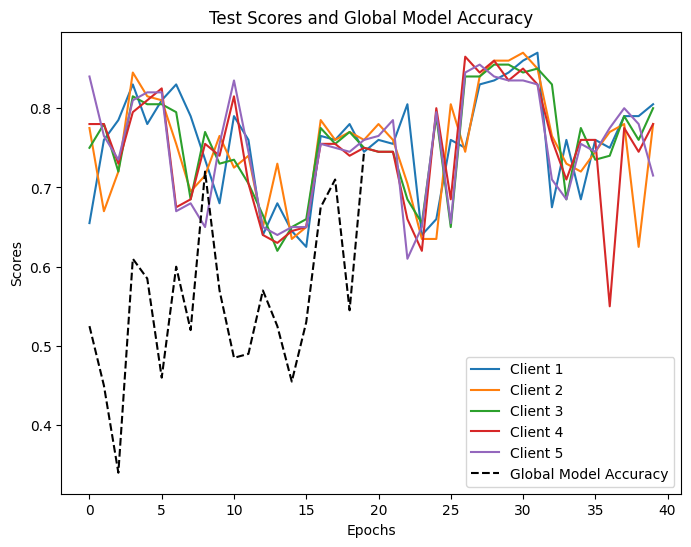

In [ ]:
import matplotlib.pyplot as plt

# Create a figure for the test scores
plt.figure(figsize=(8, 6))

# Plot test scores for all clients
for client in clients:
    plt.plot(client.test_scores, label=f'Client {clients.index(client) + 1}')

# Plot global model accuracy
plt.plot(global_model_accuracy, label='Global Model Accuracy', linestyle='--', color='black')

plt.xlabel('Epochs')
plt.ylabel('Scores')
plt.title('Test Scores and Global Model Accuracy')
plt.legend()

# Show the combined graph
plt.show()


In [ ]:
# Directly evaluate the model on the test data
    accuracy = qnn_classifier.score(test_sequences, test_labels)

    return accuracy

In [ ]:


# Temporary code to suppress all FutureWarnings for a cleaner output
warnings.simplefilter("ignore", FutureWarning)

import warnings

# Temporary code to suppress all FutureWarnings for a cleaner output
warnings.simplefilter("ignore", FutureWarning)
global_model_weights = {}
global_model_accuracy = []

for epoch in range(num_epochs):
  global_model_weights[epoch] = []
  epoch_weights = []
  print(f"epoch: {epoch}")

  for index, client in enumerate(clients):
    print(f"Index: {index}, Client: {client}")

    if client.primary_model is None:
      train_score_q, test_score_q, model = train(data = client.data[epoch])
      client.models.append(model)
      client.test_scores.append(test_score_q)
      client.train_scores.append(train_score_q)
      # Print the values
      print("Train Score:", train_score_q)
      print("Test Score:", test_score_q)
      print("\n\n")
      epoch_weights.append(model.weights)

    else:
      train_score_q, test_score_q, model = train(data = client.data[epoch], model = client.primary_model)
      client.models.append(model)
      client.test_scores.append(test_score_q)
      client.train_scores.append(train_score_q)
      print("Train Score:", train_score_q)
      print("Test Score:", test_score_q)
      print("\n\n")
      epoch_weights.append(model.weights)

  if(epoch != 0):
    epoch_weights.append(global_model_weights[epoch-1])

  average_weights = sum(epoch_weights) / len(epoch_weights)

  global_model_weights[epoch] = average_weights
  new_model_with_global_weights = create_model_with_weights(global_model_weights[epoch])
  for index, client in enumerate(clients):
    client.primary_model = new_model_with_global_weights

  global_accuracy = getAccuracy(global_model_weights[epoch])
  print(f"Global Model Accuracy In Epoch {epoch}: {global_accuracy}")
  print("----------------------------------------------------------")
  global_model_accuracy.append(global_accuracy)


epoch: 0
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started


<ipython-input-29-414fd88711be>:42: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),


1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 20 | 
Training complete. Time taken: 13.602400541305542 seconds.
SCORING MODEL
Train Score: 0.63
Test Score: 0.655



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started


<ipython-input-29-414fd88711be>:42: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),


21 | 22 | 23 | 24 | 25 | 26 | 27 | 28 | 29 | 30 | 31 | 32 | 33 | 34 | 35 | 36 | 37 | 38 | 39 | 40 | 
Training complete. Time taken: 14.186765432357788 seconds.
SCORING MODEL
Train Score: 0.83
Test Score: 0.775



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started


<ipython-input-29-414fd88711be>:42: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),


41 | 42 | 43 | 44 | 45 | 46 | 47 | 48 | 49 | 50 | 51 | 52 | 53 | 54 | 55 | 56 | 57 | 58 | 59 | 60 | 
Training complete. Time taken: 13.549050569534302 seconds.
SCORING MODEL
Train Score: 0.83
Test Score: 0.75



Index: 3, Client: <__main__.Client object at 0x7ba8d4913d90>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started


<ipython-input-29-414fd88711be>:42: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),


61 | 62 | 63 | 64 | 65 | 66 | 67 | 68 | 69 | 70 | 71 | 72 | 73 | 74 | 75 | 76 | 77 | 78 | 79 | 80 | 
Training complete. Time taken: 15.598638772964478 seconds.
SCORING MODEL
Train Score: 0.78
Test Score: 0.78



Index: 4, Client: <__main__.Client object at 0x7ba8d4913e20>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started


<ipython-input-29-414fd88711be>:42: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),


81 | 82 | 83 | 84 | 85 | 86 | 87 | 88 | 89 | 90 | 91 | 92 | 93 | 94 | 95 | 96 | 97 | 98 | 99 | 100 | 
Training complete. Time taken: 15.985165357589722 seconds.
SCORING MODEL
Train Score: 0.82
Test Score: 0.84





<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 0: 0.65
----------------------------------------------------------
epoch: 1
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
101 | 102 | 103 | 104 | 105 | 106 | 107 | 108 | 109 | 110 | 111 | 112 | 113 | 114 | 115 | 116 | 117 | 118 | 119 | 120 | 
Training complete. Time taken: 13.550233602523804 seconds.
SCORING MODEL
Train Score: 0.81
Test Score: 0.76



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
121 | 122 | 123 | 124 | 125 | 126 | 127 | 128 | 129 | 130 | 131 | 132 | 133 | 134 | 135 | 136 | 137 | 138 | 139 | 140 | 
Training complete. Time taken: 13.850713014602661 seconds.
SCORING MODEL
Train Score: 0.75
Test Score: 0.67



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
141 | 142 | 143 | 

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 1: 0.55
----------------------------------------------------------
epoch: 2
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
201 | 202 | 203 | 204 | 205 | 206 | 207 | 208 | 209 | 210 | 211 | 212 | 213 | 214 | 215 | 216 | 217 | 218 | 219 | 220 | 
Training complete. Time taken: 13.525436878204346 seconds.
SCORING MODEL
Train Score: 0.78
Test Score: 0.785



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
221 | 222 | 223 | 224 | 225 | 226 | 227 | 228 | 229 | 230 | 231 | 232 | 233 | 234 | 235 | 236 | 237 | 238 | 239 | 240 | 
Training complete. Time taken: 16.036813497543335 seconds.
SCORING MODEL
Train Score: 0.78
Test Score: 0.72



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
241 | 242 | 243 |

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 2: 0.485
----------------------------------------------------------
epoch: 3
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
301 | 302 | 303 | 304 | 305 | 306 | 307 | 308 | 309 | 310 | 311 | 312 | 313 | 314 | 315 | 316 | 317 | 318 | 319 | 320 | 
Training complete. Time taken: 14.103987455368042 seconds.
SCORING MODEL
Train Score: 0.86
Test Score: 0.83



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
321 | 322 | 323 | 324 | 325 | 326 | 327 | 328 | 329 | 330 | 331 | 332 | 333 | 334 | 335 | 336 | 337 | 338 | 339 | 340 | 
Training complete. Time taken: 13.467137813568115 seconds.
SCORING MODEL
Train Score: 0.78
Test Score: 0.845



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
341 | 342 | 343 

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 3: 0.42
----------------------------------------------------------
epoch: 4
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
401 | 402 | 403 | 404 | 405 | 406 | 407 | 408 | 409 | 410 | 411 | 412 | 413 | 414 | 415 | 416 | 417 | 418 | 419 | 420 | 
Training complete. Time taken: 17.982184171676636 seconds.
SCORING MODEL
Train Score: 0.93
Test Score: 0.78



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
421 | 422 | 423 | 424 | 425 | 426 | 427 | 428 | 429 | 430 | 431 | 432 | 433 | 434 | 435 | 436 | 437 | 438 | 439 | 440 | 
Training complete. Time taken: 13.293562889099121 seconds.
SCORING MODEL
Train Score: 0.93
Test Score: 0.815



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
441 | 442 | 443 |

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 4: 0.485
----------------------------------------------------------
epoch: 5
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
501 | 502 | 503 | 504 | 505 | 506 | 507 | 508 | 509 | 510 | 511 | 512 | 513 | 514 | 515 | 516 | 517 | 518 | 519 | 520 | 
Training complete. Time taken: 13.613452196121216 seconds.
SCORING MODEL
Train Score: 0.83
Test Score: 0.81



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
521 | 522 | 523 | 524 | 525 | 526 | 527 | 528 | 529 | 530 | 531 | 532 | 533 | 534 | 535 | 536 | 537 | 538 | 539 | 540 | 
Training complete. Time taken: 13.503629207611084 seconds.
SCORING MODEL
Train Score: 0.83
Test Score: 0.81



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
541 | 542 | 543 |

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 5: 0.525
----------------------------------------------------------
epoch: 6
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
601 | 602 | 603 | 604 | 605 | 606 | 607 | 608 | 609 | 610 | 611 | 612 | 613 | 614 | 615 | 616 | 617 | 618 | 619 | 620 | 
Training complete. Time taken: 13.436611652374268 seconds.
SCORING MODEL
Train Score: 0.8
Test Score: 0.83



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
621 | 622 | 623 | 624 | 625 | 626 | 627 | 628 | 629 | 630 | 631 | 632 | 633 | 634 | 635 | 636 | 637 | 638 | 639 | 640 | 
Training complete. Time taken: 13.163558006286621 seconds.
SCORING MODEL
Train Score: 0.76
Test Score: 0.755



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
641 | 642 | 643 |

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 6: 0.52
----------------------------------------------------------
epoch: 7
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
701 | 702 | 703 | 704 | 705 | 706 | 707 | 708 | 709 | 710 | 711 | 712 | 713 | 714 | 715 | 716 | 717 | 718 | 719 | 720 | 
Training complete. Time taken: 13.611855506896973 seconds.
SCORING MODEL
Train Score: 0.84
Test Score: 0.79



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
721 | 722 | 723 | 724 | 725 | 726 | 727 | 728 | 729 | 730 | 731 | 732 | 733 | 734 | 735 | 736 | 737 | 738 | 739 | 740 | 
Training complete. Time taken: 15.895074844360352 seconds.
SCORING MODEL
Train Score: 0.71
Test Score: 0.695



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
741 | 742 | 743 |

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 7: 0.325
----------------------------------------------------------
epoch: 8
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
801 | 802 | 803 | 804 | 805 | 806 | 807 | 808 | 809 | 810 | 811 | 812 | 813 | 814 | 815 | 816 | 817 | 818 | 819 | 820 | 
Training complete. Time taken: 13.586400747299194 seconds.
SCORING MODEL
Train Score: 0.78
Test Score: 0.735



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
821 | 822 | 823 | 824 | 825 | 826 | 827 | 828 | 829 | 830 | 831 | 832 | 833 | 834 | 835 | 836 | 837 | 838 | 839 | 840 | 
Training complete. Time taken: 13.580780267715454 seconds.
SCORING MODEL
Train Score: 0.71
Test Score: 0.715



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
841 | 842 | 843

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 8: 0.415
----------------------------------------------------------
epoch: 9
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
901 | 902 | 903 | 904 | 905 | 906 | 907 | 908 | 909 | 910 | 911 | 912 | 913 | 914 | 915 | 916 | 917 | 918 | 919 | 920 | 
Training complete. Time taken: 14.078378438949585 seconds.
SCORING MODEL
Train Score: 0.74
Test Score: 0.68



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
921 | 922 | 923 | 924 | 925 | 926 | 927 | 928 | 929 | 930 | 931 | 932 | 933 | 934 | 935 | 936 | 937 | 938 | 939 | 940 | 
Training complete. Time taken: 13.438517332077026 seconds.
SCORING MODEL
Train Score: 0.79
Test Score: 0.765



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
941 | 942 | 943 

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 9: 0.465
----------------------------------------------------------
epoch: 10
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
1001 | 1002 | 1003 | 1004 | 1005 | 1006 | 1007 | 1008 | 1009 | 1010 | 1011 | 1012 | 1013 | 1014 | 1015 | 1016 | 1017 | 1018 | 1019 | 1020 | 
Training complete. Time taken: 13.518381595611572 seconds.
SCORING MODEL
Train Score: 0.83
Test Score: 0.79



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
1021 | 1022 | 1023 | 1024 | 1025 | 1026 | 1027 | 1028 | 1029 | 1030 | 1031 | 1032 | 1033 | 1034 | 1035 | 1036 | 1037 | 1038 | 1039 | 1040 | 
Training complete. Time taken: 13.249143838882446 seconds.
SCORING MODEL
Train Score: 0.76
Test Score: 0.725



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape:

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 10: 0.58
----------------------------------------------------------
epoch: 11
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
1101 | 1102 | 1103 | 1104 | 1105 | 1106 | 1107 | 1108 | 1109 | 1110 | 1111 | 1112 | 1113 | 1114 | 1115 | 1116 | 1117 | 1118 | 1119 | 1120 | 
Training complete. Time taken: 13.53965973854065 seconds.
SCORING MODEL
Train Score: 0.76
Test Score: 0.76



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
1121 | 1122 | 1123 | 1124 | 1125 | 1126 | 1127 | 1128 | 1129 | 1130 | 1131 | 1132 | 1133 | 1134 | 1135 | 1136 | 1137 | 1138 | 1139 | 1140 | 
Training complete. Time taken: 13.421210765838623 seconds.
SCORING MODEL
Train Score: 0.75
Test Score: 0.74



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 11: 0.56
----------------------------------------------------------
epoch: 12
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
1201 | 1202 | 1203 | 1204 | 1205 | 1206 | 1207 | 1208 | 1209 | 1210 | 1211 | 1212 | 1213 | 1214 | 1215 | 1216 | 1217 | 1218 | 1219 | 1220 | 
Training complete. Time taken: 13.612537860870361 seconds.
SCORING MODEL
Train Score: 0.75
Test Score: 0.64



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
1221 | 1222 | 1223 | 1224 | 1225 | 1226 | 1227 | 1228 | 1229 | 1230 | 1231 | 1232 | 1233 | 1234 | 1235 | 1236 | 1237 | 1238 | 1239 | 1240 | 
Training complete. Time taken: 13.51270604133606 seconds.
SCORING MODEL
Train Score: 0.62
Test Score: 0.65



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 12: 0.51
----------------------------------------------------------
epoch: 13
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
1301 | 1302 | 1303 | 1304 | 1305 | 1306 | 1307 | 1308 | 1309 | 1310 | 1311 | 1312 | 1313 | 1314 | 1315 | 1316 | 1317 | 1318 | 1319 | 1320 | 
Training complete. Time taken: 13.59345030784607 seconds.
SCORING MODEL
Train Score: 0.73
Test Score: 0.68



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
1321 | 1322 | 1323 | 1324 | 1325 | 1326 | 1327 | 1328 | 1329 | 1330 | 1331 | 1332 | 1333 | 1334 | 1335 | 1336 | 1337 | 1338 | 1339 | 1340 | 
Training complete. Time taken: 14.13499927520752 seconds.
SCORING MODEL
Train Score: 0.68
Test Score: 0.73



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (1

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 13: 0.595
----------------------------------------------------------
epoch: 14
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
1401 | 1402 | 1403 | 1404 | 1405 | 1406 | 1407 | 1408 | 1409 | 1410 | 1411 | 1412 | 1413 | 1414 | 1415 | 1416 | 1417 | 1418 | 1419 | 1420 | 
Training complete. Time taken: 13.50872278213501 seconds.
SCORING MODEL
Train Score: 0.66
Test Score: 0.645



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
1421 | 1422 | 1423 | 1424 | 1425 | 1426 | 1427 | 1428 | 1429 | 1430 | 1431 | 1432 | 1433 | 1434 | 1435 | 1436 | 1437 | 1438 | 1439 | 1440 | 
Training complete. Time taken: 14.064014911651611 seconds.
SCORING MODEL
Train Score: 0.68
Test Score: 0.635



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 14: 0.51
----------------------------------------------------------
epoch: 15
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
1501 | 1502 | 1503 | 1504 | 1505 | 1506 | 1507 | 1508 | 1509 | 1510 | 1511 | 1512 | 1513 | 1514 | 1515 | 1516 | 1517 | 1518 | 1519 | 1520 | 
Training complete. Time taken: 15.995799779891968 seconds.
SCORING MODEL
Train Score: 0.66
Test Score: 0.625



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
1521 | 1522 | 1523 | 1524 | 1525 | 1526 | 1527 | 1528 | 1529 | 1530 | 1531 | 1532 | 1533 | 1534 | 1535 | 1536 | 1537 | 1538 | 1539 | 1540 | 
Training complete. Time taken: 13.547988653182983 seconds.
SCORING MODEL
Train Score: 0.62
Test Score: 0.65



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape:

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 15: 0.51
----------------------------------------------------------
epoch: 16
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
1601 | 1602 | 1603 | 1604 | 1605 | 1606 | 1607 | 1608 | 1609 | 1610 | 1611 | 1612 | 1613 | 1614 | 1615 | 1616 | 1617 | 1618 | 1619 | 1620 | 
Training complete. Time taken: 16.32716989517212 seconds.
SCORING MODEL
Train Score: 0.73
Test Score: 0.765



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
1621 | 1622 | 1623 | 1624 | 1625 | 1626 | 1627 | 1628 | 1629 | 1630 | 1631 | 1632 | 1633 | 1634 | 1635 | 1636 | 1637 | 1638 | 1639 | 1640 | 
Training complete. Time taken: 13.428049325942993 seconds.
SCORING MODEL
Train Score: 0.8
Test Score: 0.785



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape: 

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 16: 0.67
----------------------------------------------------------
epoch: 17
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
1701 | 1702 | 1703 | 1704 | 1705 | 1706 | 1707 | 1708 | 1709 | 1710 | 1711 | 1712 | 1713 | 1714 | 1715 | 1716 | 1717 | 1718 | 1719 | 1720 | 
Training complete. Time taken: 13.565122604370117 seconds.
SCORING MODEL
Train Score: 0.7
Test Score: 0.76



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
1721 | 1722 | 1723 | 1724 | 1725 | 1726 | 1727 | 1728 | 1729 | 1730 | 1731 | 1732 | 1733 | 1734 | 1735 | 1736 | 1737 | 1738 | 1739 | 1740 | 
Training complete. Time taken: 13.515593528747559 seconds.
SCORING MODEL
Train Score: 0.67
Test Score: 0.76



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 17: 0.495
----------------------------------------------------------
epoch: 18
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
1801 | 1802 | 1803 | 1804 | 1805 | 1806 | 1807 | 1808 | 1809 | 1810 | 1811 | 1812 | 1813 | 1814 | 1815 | 1816 | 1817 | 1818 | 1819 | 1820 | 
Training complete. Time taken: 13.551307439804077 seconds.
SCORING MODEL
Train Score: 0.77
Test Score: 0.78



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
1821 | 1822 | 1823 | 1824 | 1825 | 1826 | 1827 | 1828 | 1829 | 1830 | 1831 | 1832 | 1833 | 1834 | 1835 | 1836 | 1837 | 1838 | 1839 | 1840 | 
Training complete. Time taken: 13.389783143997192 seconds.
SCORING MODEL
Train Score: 0.79
Test Score: 0.77



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape:

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 18: 0.63
----------------------------------------------------------
epoch: 19
Index: 0, Client: <__main__.Client object at 0x7ba8d4911ba0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
1901 | 1902 | 1903 | 1904 | 1905 | 1906 | 1907 | 1908 | 1909 | 1910 | 1911 | 1912 | 1913 | 1914 | 1915 | 1916 | 1917 | 1918 | 1919 | 1920 | 
Training complete. Time taken: 13.452184915542603 seconds.
SCORING MODEL
Train Score: 0.77
Test Score: 0.745



Index: 1, Client: <__main__.Client object at 0x7ba8d4913f10>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
1921 | 1922 | 1923 | 1924 | 1925 | 1926 | 1927 | 1928 | 1929 | 1930 | 1931 | 1932 | 1933 | 1934 | 1935 | 1936 | 1937 | 1938 | 1939 | 1940 | 
Training complete. Time taken: 13.473649978637695 seconds.
SCORING MODEL
Train Score: 0.76
Test Score: 0.76



Index: 2, Client: <__main__.Client object at 0x7ba8d4913eb0>
Train Sequences Shape: (100, 5)
Train Labels Shape:

<ipython-input-31-6e00a5c75d1f>:28: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend),
<ipython-input-31-6e00a5c75d1f>:12: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler=BackendSampler(backend=backend)


Global Model Accuracy In Epoch 19: 0.395
----------------------------------------------------------


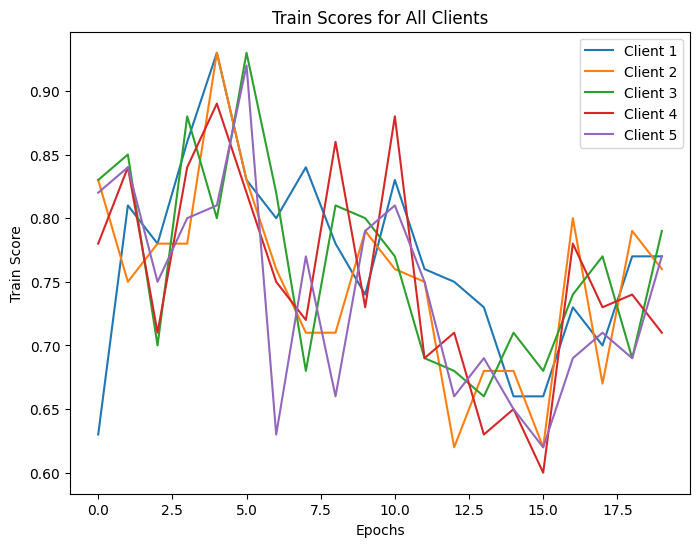

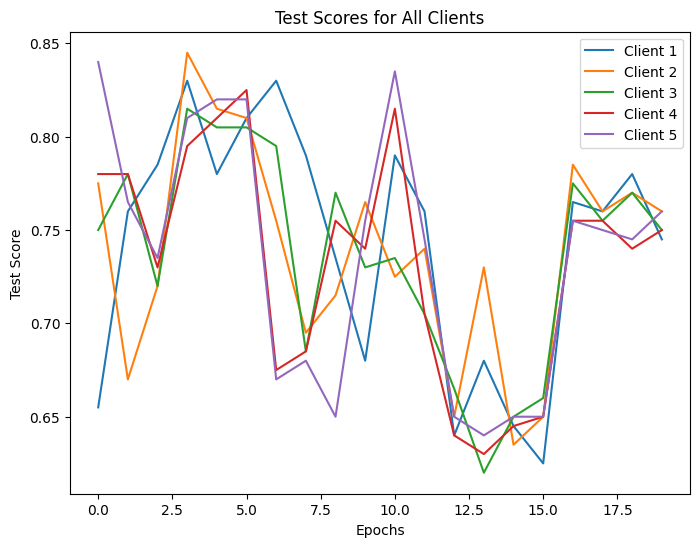

In [ ]:

import matplotlib.pyplot as plt
# Create two figures, one for train scores and one for test scores
plt.figure(figsize=(8, 6))

# Plot train scores for all clients
for client in clients:
    plt.plot(client.train_scores, label=f'Client {clients.index(client) + 1}')

plt.xlabel('Epochs')
plt.ylabel('Train Score')
plt.title('Train Scores for All Clients')
plt.legend()

# Show the train scores plot
plt.show()

# Create a new figure for test scores
plt.figure(figsize=(8, 6))

# Plot test scores for all clients
for client in clients:
    plt.plot(client.test_scores, label=f'Client {clients.index(client) + 1}')

plt.xlabel('Epochs')
plt.ylabel('Test Score')
plt.title('Test Scores for All Clients')
plt.legend()

# Show the test scores plot
plt.show()

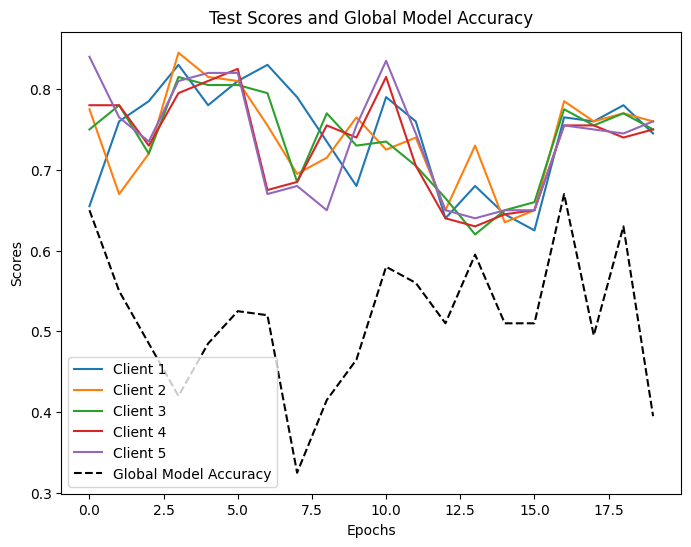

In [ ]:
import matplotlib.pyplot as plt

# Create a figure for the test scores
plt.figure(figsize=(8, 6))

# Plot test scores for all clients
for client in clients:
    plt.plot(client.test_scores, label=f'Client {clients.index(client) + 1}')

# Plot global model accuracy
plt.plot(global_model_accuracy, label='Global Model Accuracy', linestyle='--', color='black')

plt.xlabel('Epochs')
plt.ylabel('Scores')
plt.title('Test Scores and Global Model Accuracy')
plt.legend()

# Show the combined graph
plt.show()
